# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

In [14]:
# TODO

import scipy.stats as stats

#the null hypothesis is that the means of two diet groups are equal. the alternate hypothesis is that the means are different, need to calculate the difference.
Diet1 = [2.0,.5,3.0,2.8,2.3,2.7,2.5]
Diet2 = [3.0,3.2,3.1,2.9,2.8,3.0,3.2]

test_f, test_p = stats.ttest_ind(Diet1, Diet2, equal_var=True, alternative='two-sided')
print(f"t-value: {test_f}")
print(f"p-value: {test_p}")

t-value: -2.3857089149088035
p-value: 0.03440320736730501


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?


ANOVA F-value: 20.32, P-value: 0.0001
P-value below 0.05 suggests variances are different, null hypothesis rejected
Critical F-value at α = 0.05: 3.89
F-value 20.32 > 3.89. Significant differences between the means of multiple groups according to F-value, null hypothesis rejected

Tukey's HSD Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower  upper  reject
--------------------------------------------------------------
Fertilizer 1 Fertilizer 2      1.8 0.0099 0.4572 3.1428   True
Fertilizer 1 Fertilizer 3      3.2 0.0001 1.8572 4.5428   True
Fertilizer 2 Fertilizer 3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------------------


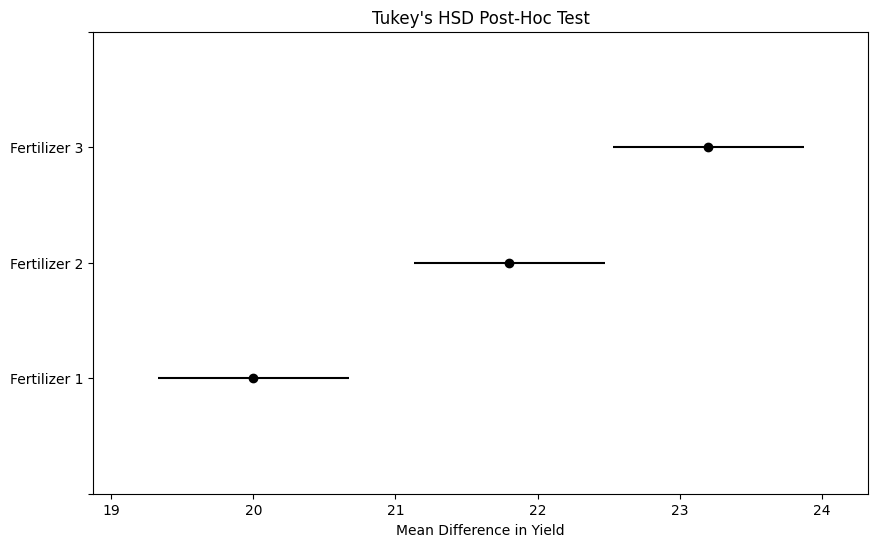

Tukey's test shows that Fertilizer 3 consistently has higher yields and it can be considered the best. 


In [29]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Data for three fertilizers
fertilizer_1 = [20, 21, 20, 19, 20]
fertilizer_2 = [22, 21, 23, 22, 21]
fertilizer_3 = [24, 23, 22, 23, 24]

data = pd.DataFrame({
    'Yield': fertilizer_1 + fertilizer_2 + fertilizer_3,
    'Fertilizer': ['Fertilizer 1'] * len(fertilizer_1) + 
                  ['Fertilizer 2'] * len(fertilizer_2) + 
                  ['Fertilizer 3'] * len(fertilizer_3)
})

# Step 2: Perform ANOVA test
f_value, p_value = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)
print(f"\nANOVA F-value: {f_value:.2f}, P-value: {p_value:.4f}")
#P-value conclusion
if p_value < 0.05:
    print(f"P-value below 0.05 suggests variances are different, null hypothesis rejected")
     
#Evaluate F-value. Find the critical F-value and make a conclusion

k = 3  # Number of groups (fertilizers)
N = len(fertilizer_1) + len(fertilizer_2) + len(fertilizer_3)  # Total observations
df_between = k - 1
df_within = N - k
alpha = 0.05
critical_f = stats.f.ppf(1 - alpha, df_between, df_within)
print(f"Critical F-value at α = {alpha}: {critical_f:.2f}")

if f_value > critical_f:
    print(f"F-value {f_value:.2f} > {critical_f:.2f}. Significant differences between the means of multiple groups according to F-value, null hypothesis rejected")


# Step 3: Post-hoc test (Tukey's HSD)
tukey_results = pairwise_tukeyhsd(endog=data['Yield'], groups=data['Fertilizer'], alpha=0.05)
print("\nTukey's HSD Results:\n", tukey_results)

fig, ax = plt.subplots(figsize=(8, 6))
tukey_results.plot_simultaneous(ax=ax)
ax.set_xlabel('Mean Difference in Yield')
ax.set_title("Tukey's HSD Post-Hoc Test")
plt.show()
print(f"Tukey's test shows that Fertilizer 3 consistently has higher yields and it can be considered the best. ")